## Compute Sagnac Frequency - Prism Spectra

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import log10

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [3]:
# from matplotlib import rc
# rc('text', usetex=True)

## Configurations

In [4]:
config = {}

# config['seed'] = "BW.DROMY..FJZ"

## PRISM
# config['tbeg'] = UTCDateTime("2023-05-09 01:00")
# config['tend'] = UTCDateTime("2023-05-09 04:00")

config['datapath'] = data_path+"sagnac_frequency/prismspectra/"


## Load Data

In [77]:
before = read_pickle(config['datapath']+"psd_2023-05-01_RZ_before_prism.pkl")
# before = read_pickle(config['datapath']+"psd_2023-05-01_RZ_before_prism_2.pkl")

## control loop still with oszilations
# after = read_pickle(config['datapath']+"psd_2023-05-04_RZ_after_prism.pkl")

## changed 15V supply box with lab supply
# after = read_pickle(config['datapath']+"psd_2023-06-03_RZ_after_prism.pkl")

## lab supply 15V and optimized control loop
# after = read_pickle(config['datapath']+"psd_2023-06-05_RZ_after_prism.pkl")
after = read_pickle(config['datapath']+"psd_2023-06-07_RZ_after_prism_new_power_supply.pkl")


In [78]:
before['fjz_psd_db'] = 20*log10(before.fjz_psd)
before['f1v_psd_db'] = 20*log10(before.f1v_psd)
before['f2v_psd_db'] = 20*log10(before.f2v_psd)

after['fjz_psd_db'] = 20*log10(after.fjz_psd)
after['f1v_psd_db'] = 20*log10(after.f1v_psd)
after['f2v_psd_db'] = 20*log10(after.f2v_psd)

In [79]:
def __makeplot():

    font = 12

    fig, ax = plt.subplots(3,2,figsize=(15,10))

    ax[0,0].loglog(before.frequencies, before.fjz_psd, alpha=0.5, label="before")
    ax[0,0].loglog(before.frequencies, after.fjz_psd, alpha=0.5, label="after")
    ax[0,0].loglog(noise1.frequencies, noise1.fjz_psd, alpha=0.5, label="selfnoise", color="grey")

    ax[1,0].loglog(before.frequencies, before.f1v_psd, alpha=0.5, label="before")
    ax[1,0].loglog(before.frequencies, after.f1v_psd, alpha=0.5, label="after")

    ax[2,0].loglog(before.frequencies, before.f2v_psd, alpha=0.5, label="before")
    ax[2,0].loglog(before.frequencies, after.f2v_psd, alpha=0.5, label="after")

    ax[0,1].semilogy(before.frequencies, before.fjz_psd, alpha=0.5, label="before")
    ax[0,1].semilogy(before.frequencies, after.fjz_psd, alpha=0.5, label="after")
    ax[0,1].semilogy(noise1.frequencies, noise1.fjz_psd, alpha=0.5, label="selfnoise", color="grey")

    ax[1,1].semilogy(before.frequencies, before.f1v_psd, alpha=0.5, label="before")
    ax[1,1].semilogy(before.frequencies, after.f1v_psd, alpha=0.5, label="after")

    ax[2,1].semilogy(before.frequencies, before.f2v_psd, alpha=0.5, label="before")
    ax[2,1].semilogy(before.frequencies, after.f2v_psd, alpha=0.5, label="after")


    for i in range(3):
        ax[i,1].set_xlim(553-30, 553+30)
        ax[i,0].legend(loc=2)
        ax[i,1].legend(loc=2)
        ax[i,0].grid(zorder=-1, alpha=0.2)
        ax[i,1].grid(zorder=-1, alpha=0.2)
    #     ax[i].ticklabel_format(useOffset=False, style='plain')


    ax[0,0].set_ylabel("PSD FZ ($V^2 / Hz$)", fontsize=font)
    ax[1,0].set_ylabel("PSD CCW ($V^2 / Hz$)", fontsize=font)
    ax[2,0].set_ylabel("PSD CW ($V^2 / Hz$)", fontsize=font)

    ax[2,0].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[2,1].set_xlabel("Frequency (Hz)", fontsize=font)

    plt.show();
    
# __makeplot()

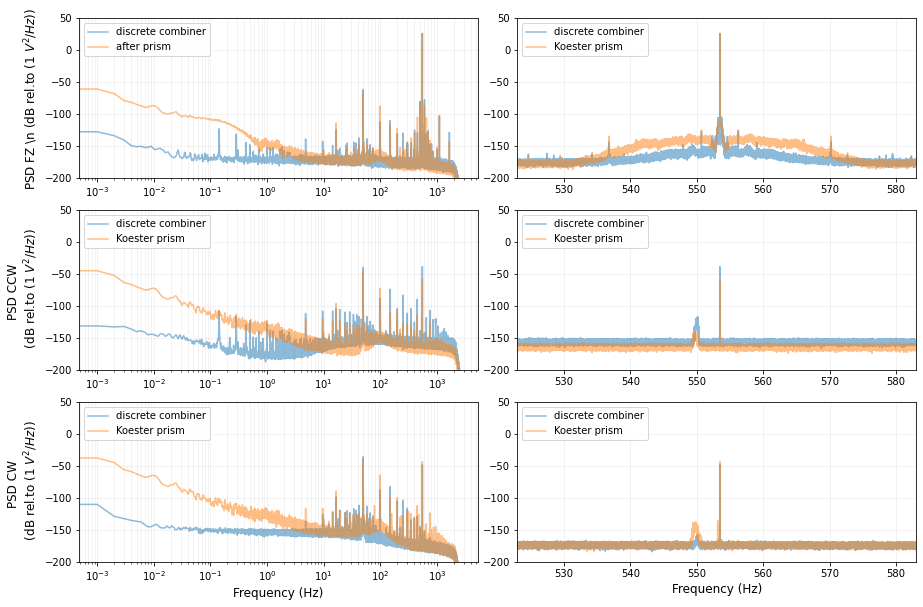

In [102]:
def __makeplot_DB():

    font = 12

    fig, ax = plt.subplots(3,2,figsize=(15,10))

    plt.subplots_adjust(wspace=0.1)
    
    ax[0,0].semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, label="discrete combiner")
    ax[0,0].semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, label="after prism")

    ax[1,0].semilogx(before.frequencies, before.f1v_psd_db, alpha=0.5, label="discrete combiner")
    ax[1,0].semilogx(before.frequencies, after.f1v_psd_db, alpha=0.5, label="Koester prism")

    ax[2,0].semilogx(before.frequencies, before.f2v_psd_db, alpha=0.5, label="discrete combiner")
    ax[2,0].semilogx(before.frequencies, after.f2v_psd_db, alpha=0.5, label="Koester prism")

    ax[0,1].plot(before.frequencies, before.fjz_psd_db, alpha=0.5, label="discrete combiner")
    ax[0,1].plot(before.frequencies, after.fjz_psd_db, alpha=0.5, label="Koester prism")

    ax[1,1].plot(before.frequencies, before.f1v_psd_db, alpha=0.5, label="discrete combiner")
    ax[1,1].plot(before.frequencies, after.f1v_psd_db, alpha=0.5, label="Koester prism")

    ax[2,1].plot(before.frequencies, before.f2v_psd_db, alpha=0.5, label="discrete combiner")
    ax[2,1].plot(before.frequencies, after.f2v_psd_db, alpha=0.5, label="Koester prism")


    for i in range(3):
        ax[i,1].set_xlim(553-30, 553+30)
        ax[i,0].legend(loc=2)
        ax[i,1].legend(loc=2)
        ax[i,0].grid(zorder=-1, alpha=0.2, which="both")
        ax[i,1].grid(zorder=-1, alpha=0.2, which="both")

        
    for i in range(3):
        for j in range(2):
            ax[i,j].set_ylim(-200,50)
            
    #     ax[i].ticklabel_format(useOffset=False, style='plain')


    ax[0,0].set_ylabel(r"PSD FZ \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)
    ax[1,0].set_ylabel(f"PSD CCW \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)
    ax[2,0].set_ylabel(f"PSD CW \n (dB rel.to (1 $V^2 / Hz$))", fontsize=font)

    ax[2,0].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[2,1].set_xlabel("Frequency (Hz)", fontsize=font)

    plt.show();

__makeplot_DB()

In [81]:
# from andbro__read_sds import __read_sds
# from obspy import Stream, UTCDateTime

# ## ____________________________________

# config2 = {}

# config2['seeds'] = ["BW.DROMY.*.FJZ"]

# config2['path_to_sds'] = archive_path+"romy_archive/"

# config2['tbeg'] = UTCDateTime("2023-05-01 16:00")
# config2['tend'] = UTCDateTime("2023-05-01 19:00")

# ## ____________________________________

# st0 = Stream()

# for seed in config2['seeds']:

#     print(f" -> loading {seed}...")
    
#     try:
#         st00 = __read_sds(config2['path_to_sds'], seed, config2['tbeg'], config2['tend'], data_format='MSEED')
#     except:
#         print(f" -> failed for {seed}")
        
#     st0 += st00

# st0 = st0.sort() 
   
# for tr in st0:
#     tr.data = tr.data*0.59604645e-6 # V / count  [0.59604645ug  from obsidian]
    
# st0.plot(equal_scale=False);

## Plot Comparison

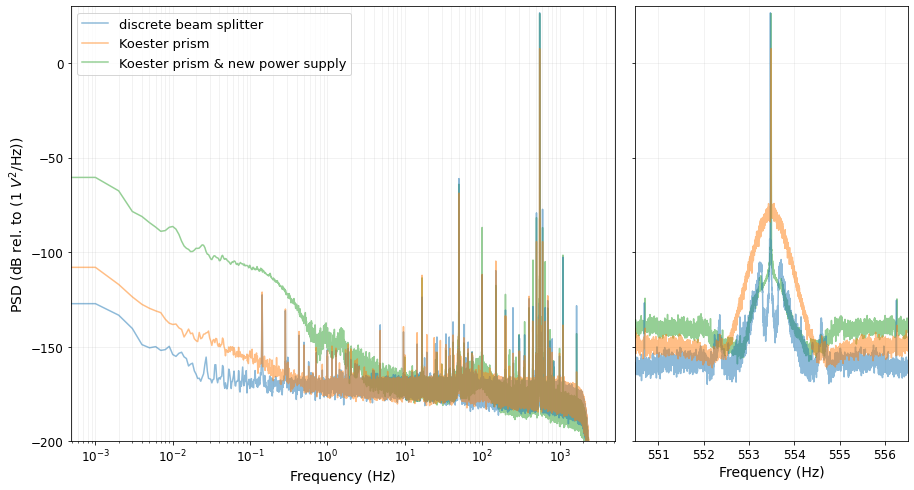

In [143]:
after1 = read_pickle(config['datapath']+"psd_2023-05-01_RZ_before_prism.pkl")
after2 = read_pickle(config['datapath']+"psd_2023-05-04_RZ_after_prism.pkl")
after3 = read_pickle(config['datapath']+"psd_2023-06-07_RZ_after_prism_new_power_supply.pkl")

after1['fjz_psd_db'] = 20*log10(after1.fjz_psd)
after2['fjz_psd_db'] = 20*log10(after2.fjz_psd)
after3['fjz_psd_db'] = 20*log10(after3.fjz_psd)


from matplotlib.gridspec import GridSpec

font = 14


fig = plt.figure(figsize=(15,8))

plt.subplots_adjust(wspace=0.05)

gs = GridSpec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
ax1.semilogx(after1.frequencies, after1.fjz_psd_db, alpha=0.5, color="tab:blue", label="discrete beam splitter")
ax1.semilogx(after2.frequencies, after2.fjz_psd_db, alpha=0.5, color="tab:orange", label="Koester prism")
ax1.semilogx(after3.frequencies, after3.fjz_psd_db, alpha=0.5, color="tab:green", label="Koester prism & new power supply", zorder=0)

ax1.grid(alpha=0.2, which="both")
ax1.set_xlabel("Frequency (Hz)", fontsize=font)
ax1.set_ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
ax1.legend(loc=2, fontsize=font-1)
ax1.set_ylim(-200, 30)
ax1.tick_params(labelsize=font-2)   



ax2 = fig.add_subplot(gs[1])
ax2.plot(after1.frequencies, after1.fjz_psd_db, alpha=0.5, color="tab:blue", label="discrete beam splitter")
ax2.plot(after2.frequencies, after2.fjz_psd_db, alpha=0.5, color="tab:orange", label="Koester prism")
ax2.plot(after3.frequencies, after3.fjz_psd_db, alpha=0.5, color="tab:green", label="Koester prism & new power supply", zorder=0)

ax2.set_xlim(553.5-3, 553.5+3)
ax2.set_xlabel("Frequency (Hz)", fontsize=font)
ax2.grid(alpha=0.2, which="both")
ax2.set_ylim(-200, 30)
ax2.tick_params(labelsize=font-2)   
ax2.set_yticklabels([])

plt.show();

## Compare with Noise

In [83]:
## RW channel, loose cable with 50 Ohm endpiece  [2023-06-01  11:30 - 14:30 UTC]

noise1 = read_pickle(config['datapath']+"psd_2023-06-01_noise_NoConnection_Endpiece.pkl")
noise1['fjz_psd_db'] = 20*log10(noise1.fjz_psd)


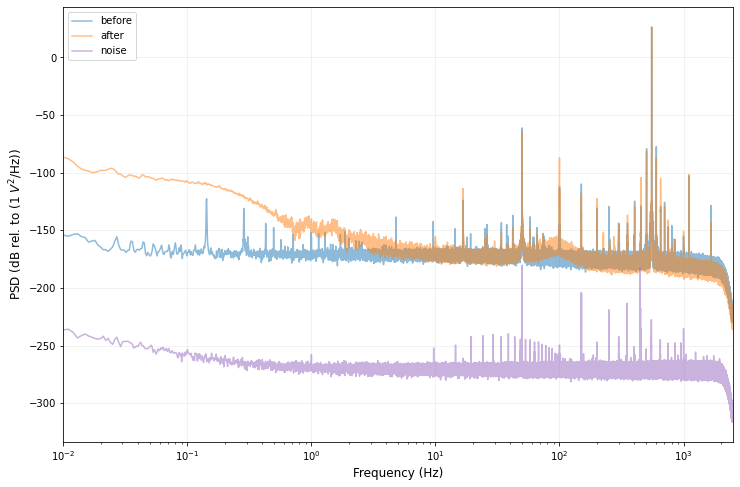

In [84]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")
ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")

ax.semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [85]:
## RU channel, electronics off, PMT power off [2023-06-01  11:30 - 14:30 UTC]

noise2 = read_pickle(config['datapath']+"psd_2023-06-01_noise_PmtPowerOff_ElectronicsOff.pkl")
noise2['fjz_psd_db'] = 20*log10(noise2.fjz_psd)


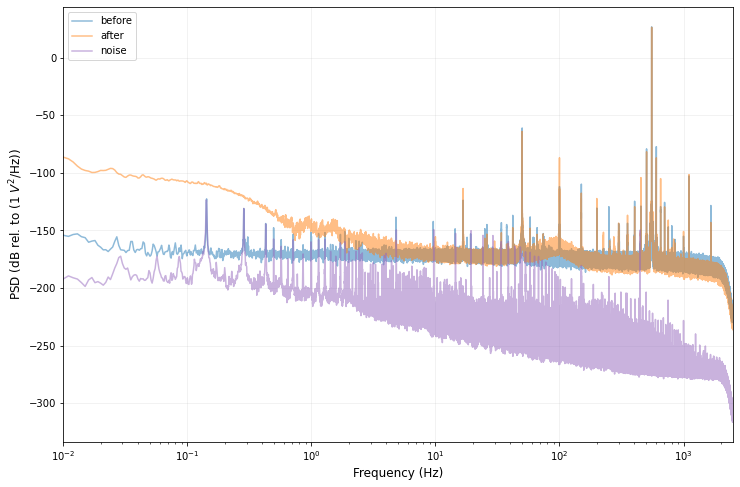

In [86]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")
ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")

ax.semilogx(noise2.frequencies, noise2.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [87]:
## RZ channel, electronics on, PMT power on, PMT blocked [2023-06-01  11:30 - 14:30 UTC]

noise3 = read_pickle(config['datapath']+"psd_2023-06-01_noise_PmtPowerOn_ElectricsOn_PmtBlocked.pkl")
# noise3 = read_pickle(config['datapath']+"psd_2023-06-07_RZ_noise_no_lasing.pkl")

noise3['fjz_psd_db'] = 20*log10(noise3.fjz_psd)

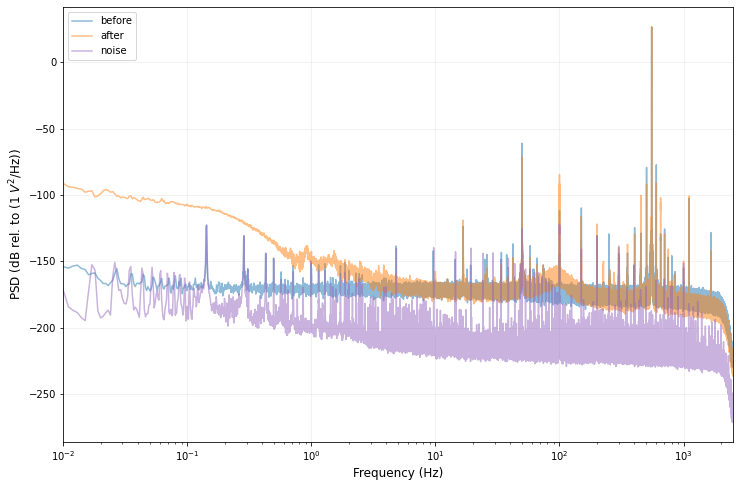

In [37]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")
ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")

ax.semilogx(noise3.frequencies, noise3.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

In [23]:
## channel RZ, self noise with no adapter only obsidian [ 2023-06-07 09:40 - 12:40 UTC]

noise4 = read_pickle(config['datapath']+"psd_2023-06-07_RZ_selfnoise_obsidian.pkl")
noise4['fjz_psd_db'] = 20*log10(noise4.fjz_psd)

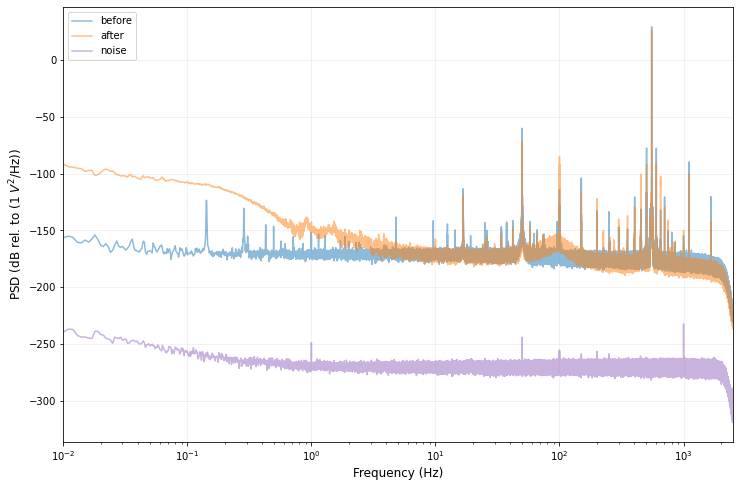

In [24]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")
ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")

ax.semilogx(noise4.frequencies, noise4.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();

## All Noise together

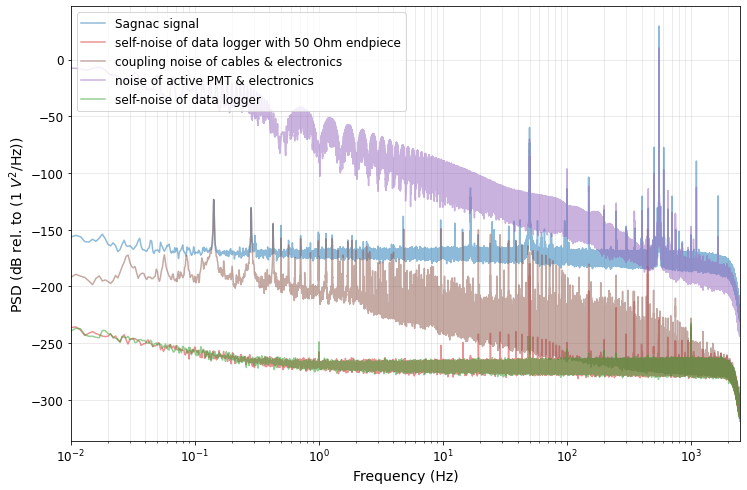

In [25]:
font = 14

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(before.frequencies, before.fjz_psd_db, alpha=0.5, color="tab:blue", label="Sagnac signal")
# ax.semilogx(after.frequencies, after.fjz_psd_db, alpha=0.5, color="tab:orange", label="after")


ax.semilogx(noise1.frequencies, noise1.fjz_psd_db, alpha=0.5, color="tab:red", label="self-noise of data logger with 50 Ohm endpiece")
ax.semilogx(noise2.frequencies, noise2.fjz_psd_db, alpha=0.5, color="tab:brown", label="coupling noise of cables & electronics")
ax.semilogx(noise3.frequencies, noise3.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise of active PMT & electronics")
ax.semilogx(noise4.frequencies, noise4.fjz_psd_db, alpha=0.5, color="tab:green", label="self-noise of data logger")

plt.grid(alpha=0.3, which="both")
plt.xlim(1e-2, 2.5e3)

plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2,fontsize=font-2)

plt.tick_params(labelsize=font-2)   

plt.show();